### Problem Statement : Predting the following job title Salaries

In [1]:
import pandas as pd
data = pd.read_csv("../datasets/DataScience_salaries_2024.csv")
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,MI,FT,Data Scientist,30400000,CLP,40038,CL,100,CL,L
1,2021,MI,FT,BI Data Analyst,11000000,HUF,36259,HU,50,US,L
2,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
3,2021,MI,FT,ML Engineer,8500000,JPY,77364,JP,50,JP,S
4,2022,SE,FT,Lead Machine Learning Engineer,7500000,INR,95386,IN,50,IN,L


In [2]:
data.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,14838.000000,1.483800e+04,14838.000000,14838.000000
mean,2023.138900,1.650227e+05,149874.718763,32.760480
std,0.700799,3.562354e+05,69009.181349,46.488278
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2023.000000,1.021000e+05,102000.000000,0.000000
50%,2023.000000,1.422000e+05,141300.000000,0.000000
75%,2024.000000,1.875000e+05,185900.000000,100.000000
max,2024.000000,3.040000e+07,800000.000000,100.000000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14838 entries, 0 to 14837
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           14838 non-null  int64 
 1   experience_level    14838 non-null  object
 2   employment_type     14838 non-null  object
 3   job_title           14838 non-null  object
 4   salary              14838 non-null  int64 
 5   salary_currency     14838 non-null  object
 6   salary_in_usd       14838 non-null  int64 
 7   employee_residence  14838 non-null  object
 8   remote_ratio        14838 non-null  int64 
 9   company_location    14838 non-null  object
 10  company_size        14838 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.2+ MB


## Checking if there is any missing values or not

In [4]:
data.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [5]:
data.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [6]:
import plotly.express as px

# Exploratory Data Analysis

### Salary Distribution

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
salary_stats = data['salary'].describe()

## Checking Salary Distribution

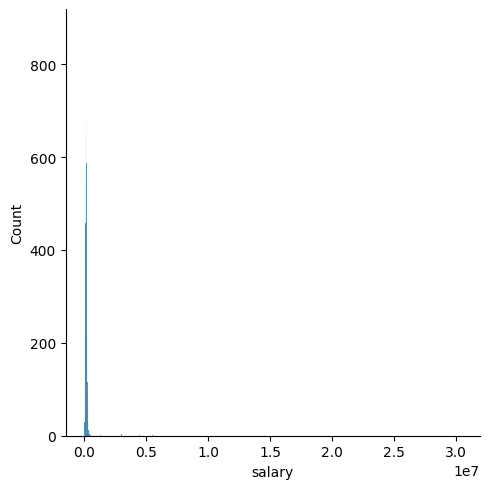

In [9]:
sns.displot(data["salary"])
plt.show()

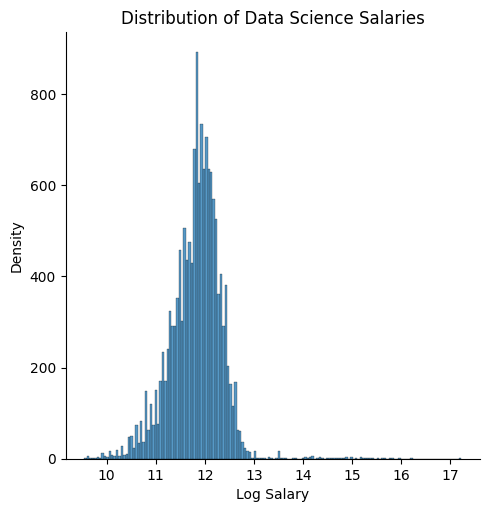

In [10]:
import numpy as np
if data["salary"].skew() > 1: 
    data["log_salary"] = np.log(data["salary"])
    sns.displot(data["log_salary"])
    plt.xlabel("Log Salary") 
else:
    sns.displot(data["salary"])
    plt.xlabel("Salary")
plt.title("Distribution of Data Science Salaries")
plt.ylabel("Density")
plt.show()

### Experience Level

In [11]:
exp_lev = data.groupby('experience_level')['salary'].describe()
exp_lev

,count,mean,std,min,25%,50%,75%,max
experience_level,,,,,,,,
EN,1148.0,129846.022648,375509.680524,14000.0,57865.0,85000.0,120000.0,6600000.0
EX,441.0,209271.777778,288507.397450,15000.0,145000.0,192000.0,236000.0,6000000.0
MI,3553.0,160820.961441,634113.029437,15000.0,80000.0,115000.0,158080.0,30400000.0
SE,9696.0,168714.742162,161789.394619,21600.0,120350.0,155000.0,200000.0,7500000.0


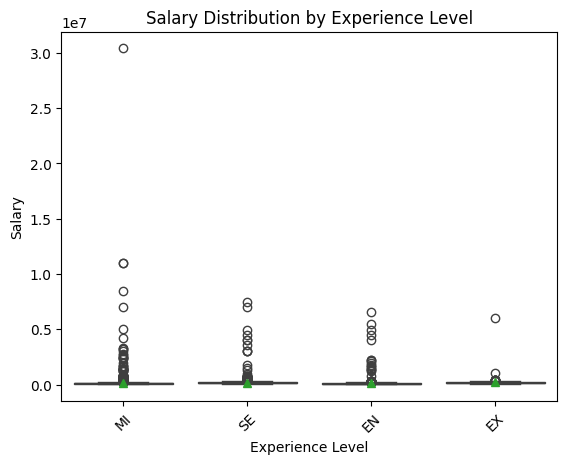

In [12]:
sns.boxplot(
    x="experience_level",
    y="salary",
    showmeans=True,  # Display mean salary for each experience level
    data=data
)
plt.xlabel("Experience Level")
plt.ylabel("Salary")
plt.title("Salary Distribution by Experience Level")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()

## Bivariate Analysis

### Salary vs. Experience:

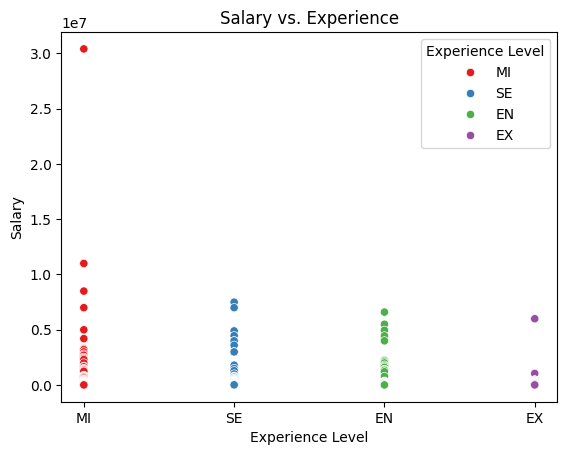

In [13]:
sns.scatterplot(data=data, x=data['experience_level'], y=data['salary'], hue='experience_level', palette='Set1')
plt.xlabel("Experience Level")
plt.ylabel("Salary")
plt.title("Salary vs. Experience")
plt.legend(title="Experience Level")  # Include legend for color-coding
plt.show()

### Salary vs. Job Title

In [14]:
data['job_title'].value_counts()

job_title
Data Engineer                      3162
Data Scientist                     3015
Data Analyst                       2189
Machine Learning Engineer          1542
Research Scientist                  475
                                   ... 
Deep Learning Researcher              1
Big Data Developer                    1
AWS Data Architect                    1
Staff Machine Learning Engineer       1
CRM Data Analyst                      1
Name: count, Length: 153, dtype: int64

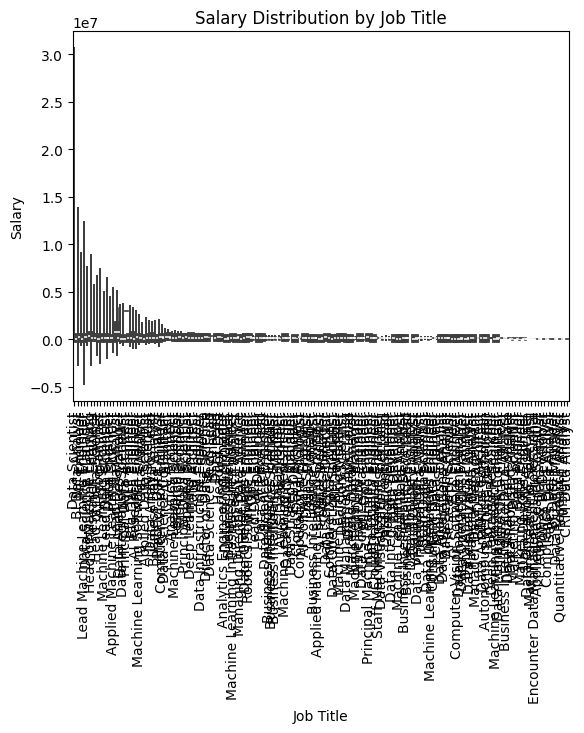

In [15]:
num_job_titles = data["job_title"].nunique() # 153

# Choose the appropriate visualization based on the number of job titles
if num_job_titles <= 10 and data["job_title"].value_counts().is_monotonic():  # Ordered categories and limited number
    # Bar chart
    sns.barplot(x="job_title", y="salary", data=data)
    plt.xlabel("Job Title")
    plt.ylabel("Salary")
    plt.title("Salary Distribution by Job Title")
    plt.xticks(rotation=45)  # Rotate x-axis labels for readability
    plt.show()
else:
    # Consider using violin plots for better visualization with many categories
    sns.violinplot(x="job_title", y="salary", data=data)
    # sns.boxplot(x="job_title", y="salary", showmeans=True, data=data)  # You can also use boxplots
    plt.xlabel("Job Title")
    plt.ylabel("Salary")
    plt.title("Salary Distribution by Job Title")
    plt.xticks(rotation=90)  # Rotate x-axis labels for many categories
    plt.show()

### Salary vs. Employment Type (Full-time, Part-time, Contract):

In [16]:
data['employment_type'].value_counts()

employment_type
FT    14772
PT       27
CT       26
FL       13
Name: count, dtype: int64

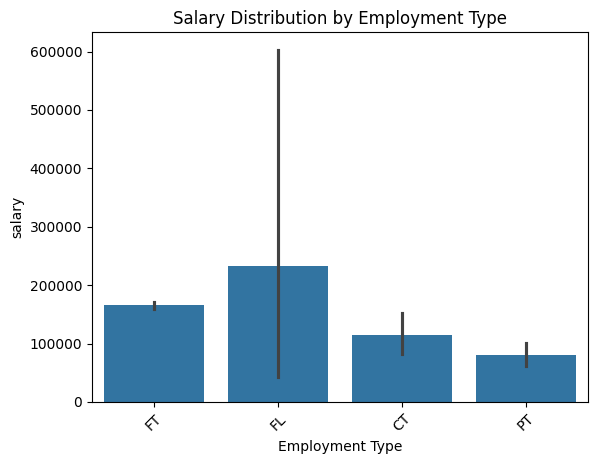

In [17]:
sns.barplot(data=data, x='employment_type', y='salary')
plt.xlabel("Employment Type")
plt.title("Salary Distribution by Employment Type")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()

### Salary vs. Company Size

In [18]:
data['company_size'].value_counts()

company_size
M    13674
L      983
S      181
Name: count, dtype: int64

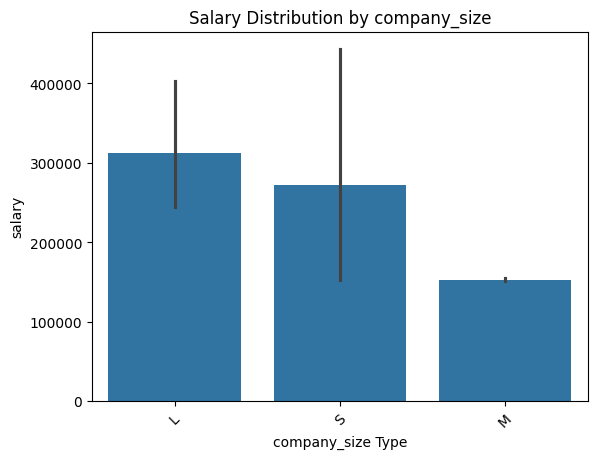

In [19]:
sns.barplot(data=data, x='company_size', y='salary')
plt.xlabel("company_size Type")
plt.title("Salary Distribution by company_size")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()

### Merge small value_counts

In [20]:
data['job_title'].value_counts()

job_title
Data Engineer                      3162
Data Scientist                     3015
Data Analyst                       2189
Machine Learning Engineer          1542
Research Scientist                  475
                                   ... 
Deep Learning Researcher              1
Big Data Developer                    1
AWS Data Architect                    1
Staff Machine Learning Engineer       1
CRM Data Analyst                      1
Name: count, Length: 153, dtype: int64

## Preprocessing the columns

In [21]:
job_title_counts = data['job_title'].value_counts()
top_jobs = 10
top_jobs_title = job_title_counts.head(top_jobs)
top_jobs_title
top_title = top_jobs_title.index
top_title

Index(['Data Engineer', 'Data Scientist', 'Data Analyst',
       'Machine Learning Engineer', 'Research Scientist', 'Analytics Engineer',
       'Applied Scientist', 'Data Architect', 'Research Engineer',
       'Business Intelligence Engineer'],
      dtype='object', name='job_title')

In [22]:
total_title = np.array(data['job_title'])
total_title = [total_title[i] if total_title[i] in top_title else 'other' for i in range(len(total_title))]
total_title = pd.DataFrame(total_title)
data['job_title'] = total_title
data.sample(4)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,log_salary
215,2024,SE,FT,Machine Learning Engineer,340000,USD,340000,US,0,US,M,12.736701
1550,2024,SE,FT,other,236000,USD,236000,US,0,US,M,12.371587
3758,2023,SE,FT,Data Scientist,186300,USD,186300,US,100,US,M,12.135114
8148,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L,11.820410


In [23]:
max_residence=  data['employee_residence'].value_counts().head(6)
residence = np.array(data['employee_residence'])
residence = [r if r in max_residence else 'other' for r in residence]
residence = pd.DataFrame(residence)
data['employee_residence'] = residence


In [24]:
max_location = data['company_location'].value_counts().head(6)
location = np.array(data['company_location'])
location = [l if l in max_location else 'other' for l in location]
location = pd.DataFrame(location)
data['company_location'] = residence

In [25]:
max_currencies = data['salary_currency'].value_counts().head(6)
currencies = np.array(data['salary_currency'])
currencies = [l if l in max_currencies else 'other' for l in currencies]
currencies = pd.DataFrame(currencies)
data['salary_currency'] = currencies

### Label Encoding the Columns

In [26]:
from sklearn.calibration import LabelEncoder
le_col = [i for i in data.columns if data[i].dtype == 'object']

le = LabelEncoder()

In [27]:
le_col

['experience_level',
 'employment_type',
 'job_title',
 'salary_currency',
 'employee_residence',
 'company_location',
 'company_size']

In [28]:
for i in le_col:
    data[i] = le.fit_transform(data[i])
data

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,log_salary
0,2021,2,2,6,30400000,6,40038,6,100,6,0,17.229953
1,2021,2,2,10,11000000,6,36259,6,50,6,0,16.213406
2,2020,2,2,6,11000000,6,35735,6,50,6,0,16.213406
3,2021,2,2,10,8500000,6,77364,6,50,6,2,15.955577
4,2022,3,2,10,7500000,4,95386,4,50,4,0,15.830414
...,...,...,...,...,...,...,...,...,...,...,...,...
14833,2022,2,2,10,15000,5,15000,6,100,6,1,9.615805
14834,2020,1,2,10,15000,5,15000,6,0,6,1,9.615805
14835,2021,0,2,10,15000,5,15000,6,100,6,0,9.615805
14836,2022,0,2,3,15000,5,15000,6,0,6,0,9.615805


## Handling Outliers

In [30]:
for col in data.columns[:-1]:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    data = data[(data[col] >= (Q1 - 1.5*IQR)) & (data[col] <= (Q3 + 1.5*IQR))]
data

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,log_salary
408,2023,3,2,10,302000,5,302000,5,0,5,1,12.618182
409,2023,3,2,6,300240,5,300240,5,0,5,1,12.612337
410,2023,3,2,6,300240,5,300240,5,0,5,1,12.612337
411,2023,3,2,10,300105,5,300105,5,0,5,1,12.611888
412,2024,3,2,10,300000,5,300000,5,0,5,1,12.611538
...,...,...,...,...,...,...,...,...,...,...,...,...
14622,2023,2,2,3,36000,5,36000,5,100,5,1,10.491274
14774,2024,3,2,10,25000,5,25000,5,0,5,1,10.126631
14781,2022,3,2,5,25000,5,25000,5,100,5,1,10.126631
14786,2022,2,2,5,24000,5,24000,5,0,5,1,10.085809


## Splititng data

In [31]:
from sklearn.model_selection import train_test_split
X = data.drop(columns='salary_in_usd')
y = data['salary_in_usd']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 ,random_state=123)

## Random Forest Regressor

In [32]:
from sklearn.ensemble import RandomForestRegressor


rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf.score(X_train,y_train)

0.9999996611872901

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

steps=[('scaler', StandardScaler()), ('lm',  RandomForestRegressor())]
pipe_rf = Pipeline(steps=steps)
pipe_rf.fit(X_train, y_train)

salary_price_predictions = pipe_rf.predict(X_test)
mse = mean_squared_error(y_test, salary_price_predictions)
rmse = np.sqrt(mse)
rmse


51.46235880252322

In [40]:
from sklearn.metrics import r2_score 
r2_score(y_test,salary_price_predictions)

0.9999990767299695

## Linear Regression

In [36]:
steps=[('scaler', StandardScaler()), ('lm',  LinearRegression())]

pipe = Pipeline(steps=steps)
pipe.fit(X_train, y_train)
salary_price_predictions=pipe.predict(X_test)
r2_score(salary_price_predictions, y_test)

1.0